### Coding Samurai Internship Project  Task_4 - Titanic Survival Prediction using Logistic Regression 
#### This project applies **EDA and Logistic Regression**

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer

# Load Dataset
df = pd.read_csv(r'C:\Users\hp\OneDrive\Documents\projects\CODING_SAMURAI_INTERNSHIP_TASK\Task_1 Titanic\titanic_data\titanic_train\train.csv')

# Display first few rows
df.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### 1. Data Overview
###### Started by checking dataset dimensions, column information, and missing values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# missing value count 
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### 2. Handling Missing Values
###### - Age: Impute missing values with median (because it's skewed).
###### - Embarked: Fill with mode (most common port).
###### - Cabin: Droped due to too many missing values.

In [4]:
# droping irrevant column
df.drop(columns=['Cabin'], inplace=True)

In [5]:
# imputation of missing values 
mn = (MeanMedianImputer(imputation_method='median', variables=['Age']))
df = mn.fit_transform(df)

In [6]:
cl = CategoricalImputer(imputation_method='frequent', variables=['Embarked'])
df = cl.fit_transform(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


##### 3. Exploratory Data Analysis (EDA)
###### Basic Statistics - Descriptive statistics to understand central tendency and spread.

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### 4. Univariate Analysis
###### Exploring single variables like *Age, Fare, Sex, and Survived*.

In [9]:
# Aesthetics
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (5,4)

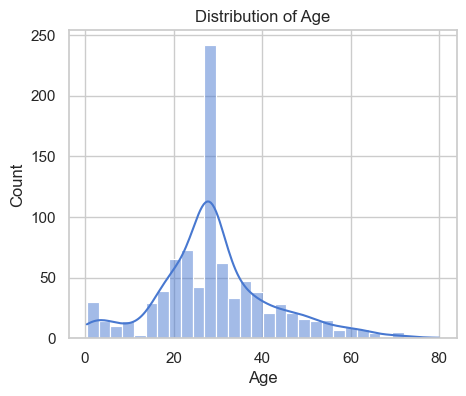

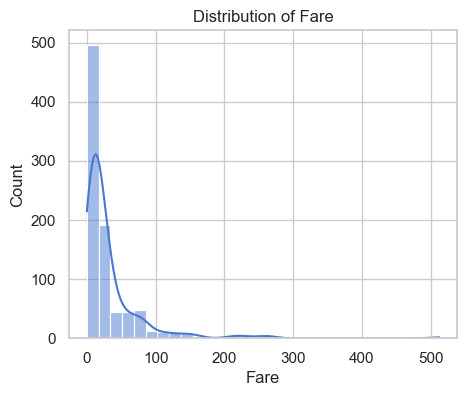

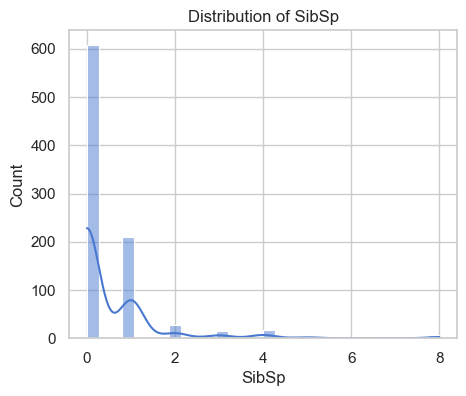

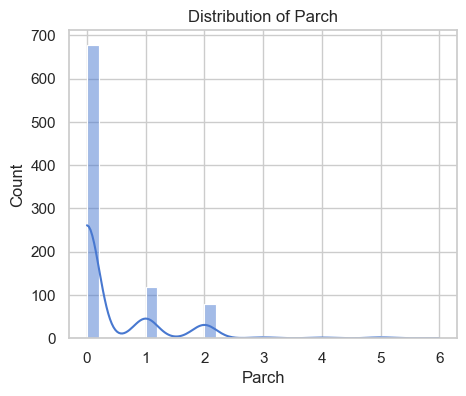

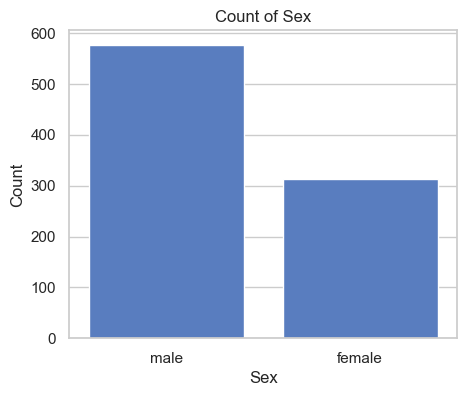

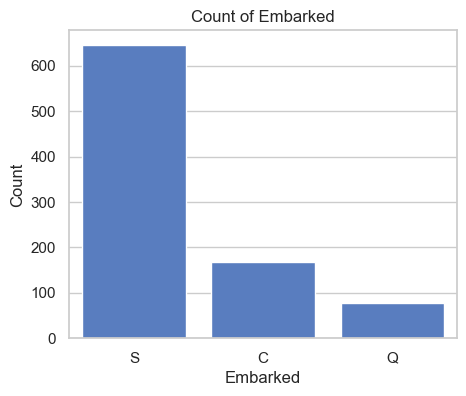

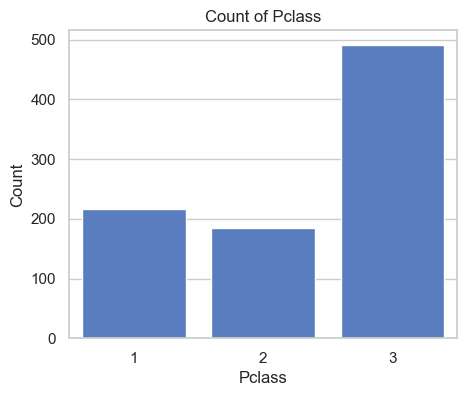

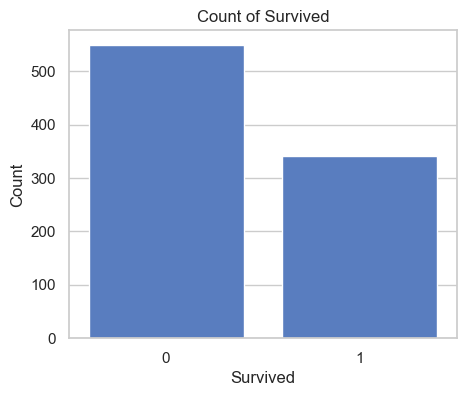

In [10]:
# Numerical
numerical_cols = ['Age', 'Fare', 'SibSp','Parch']
for col in numerical_cols:
    plt.figure(figsize=(5, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Categorical
categorical_cols = ['Sex', 'Embarked', 'Pclass', 'Survived']
for col in categorical_cols:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

##### 5. Bivariate Analysis
###### Checking the relationship between *Features and Target Feature(Survival)*.

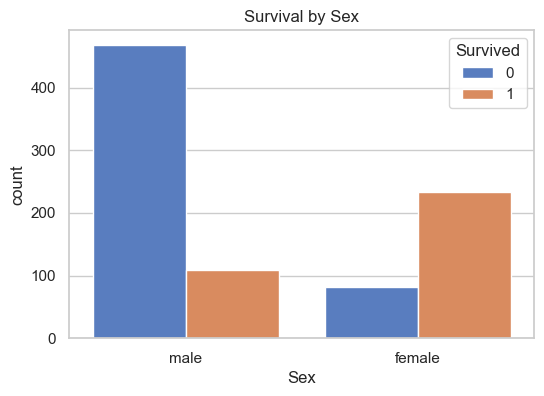

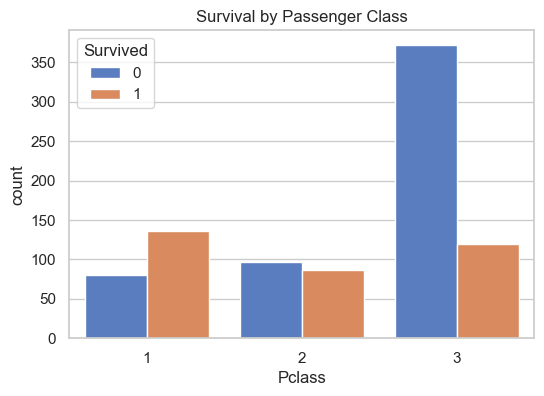

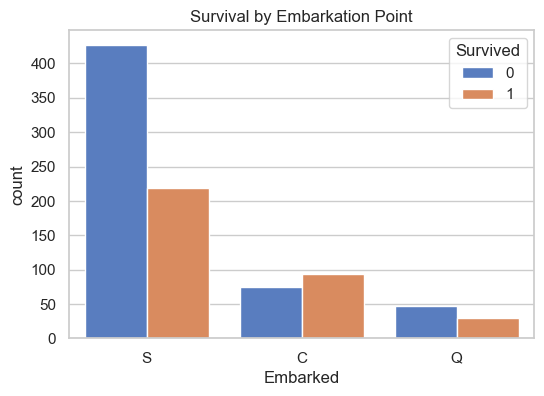

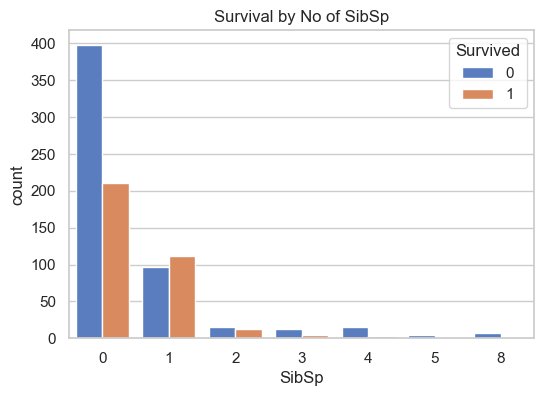

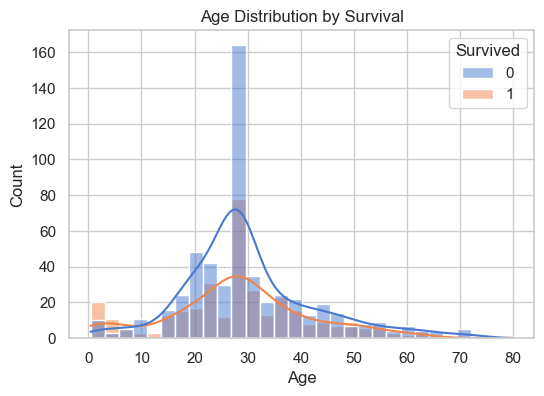

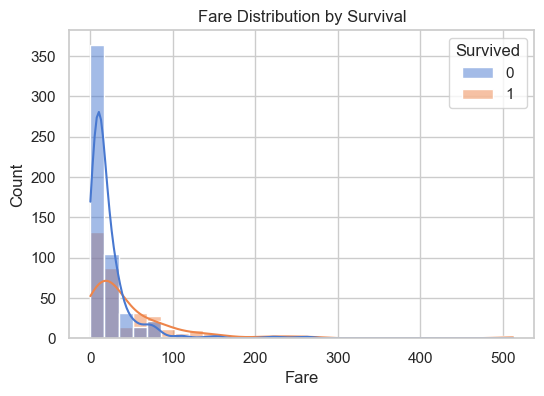

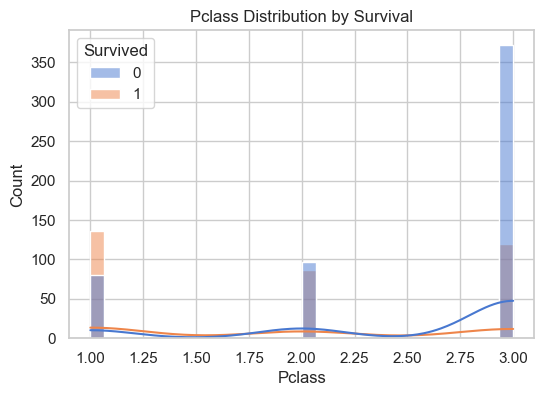

In [11]:
# Survival vs Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Sex")
plt.show()

# Survival vs Pclass
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

# Survival vs Embarked
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival by Embarkation Point")
plt.show()

# Survival vs SibSp
plt.figure(figsize=(6,4))
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title("Survival by No of SibSp")
plt.show()

# Age vs Survival
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()

# Fare vs Survival
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, bins=30)
plt.title("Fare Distribution by Survival")
plt.show()

# Pclass vs Survival
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Pclass', hue='Survived', kde=True, bins=30)
plt.title("Pclass Distribution by Survival")
plt.show()


###### Multivariate Analysis

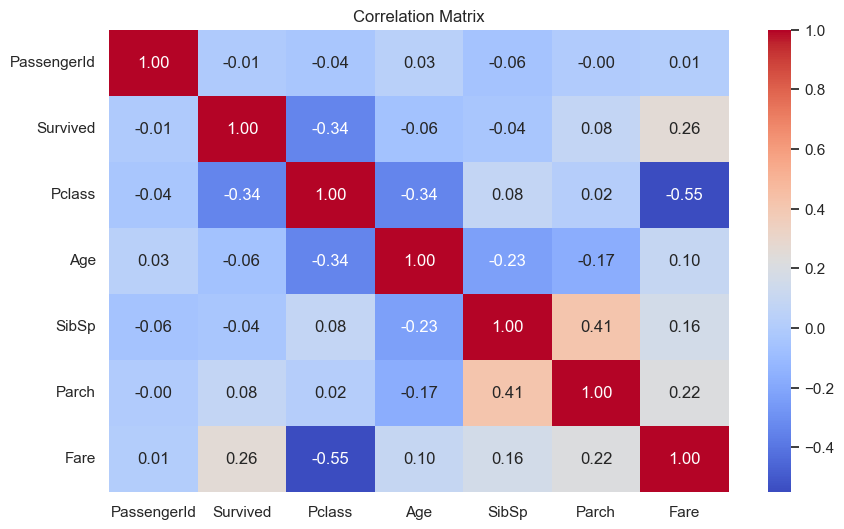

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

##### 8. EDA Insights
- ###### Gender: Women had a higher survival rate compared to men.
- ###### Pclass: Passengers in 1st class survived more often than those in 3rd class.
- ###### Age: Younger passengers had slightly better chances of survival.
- ###### Fare: Higher fares (wealthier passengers) were associated with higher survival.
- ###### Missing Values: Age was imputed with median, Embarked with mode, and Cabin dropped.

#### **Coding Samurai Internship Project  Task_4 - Titanic Survival Prediction using Logistic Regression** 
##### This project applies **Logistic Regression**, Using the insights gained from the EDA, to build a Logistic Regression model to predict passenger survival. Logistic Regression is suitable for this dataset because the target variable (Survived) is binary: 1 = Survived while 0 = Did not survive.  

 - ##### Data cleaning & preprocessing (handling missing values, encoding categorical variables).
 - ##### Feature engineering & selection.
 - ##### Building a binary classification model using Logistic Regression.  
 - ##### Model evaluation with classification metrics.  
 - ##### Clear documentation and structured workflow. 


In [13]:
# Importing Required Libaries
from feature_engine.encoding import OrdinalEncoder, OneHotEncoder
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##### **Feature Engineering**
- ###### Feature Extraction
- ###### Encoding(OrdinalEncoder & OneHotEncoding)
- ###### Outliers.
- ###### Feature Scaling.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


- ###### **Feature Extraction**

In [15]:
# Extracting Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replacing rare titles with 'Rare'
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                   'Don', 'Dr', 'Major', 'Rev', 'Sir',\
                                   'Jonkheer', 'Dona'], 'Rare')

# Grouping similar titles together
df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

print(df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\hp\AppData\Local\Temp\ipykernel_8592\1878383593.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


- ###### **Encoding**

In [16]:
# Encoding(OrdinalEncoder)
Oe = OrdinalEncoder(encoding_method='arbitrary', variables = ['Pclass', 'Sex', 'Embarked'])
df = Oe.fit_transform(df)

TypeError: Some of the variables are not categorical. Please cast them as object or categorical before using this transformer.

In [17]:
# Making sure 'Pclass' and 'Title is treated as categorical instead of numeric
df['Pclass'] = df['Pclass'].astype('category')
df['Title'] = df['Title'].astype('category')

In [18]:
# Encoding(OrdinalEncoder)
Oe = OrdinalEncoder(encoding_method='arbitrary', variables = ['Pclass', 'Sex', 'Embarked'])
df = Oe.fit_transform(df)

In [19]:
# Encoding(OneHotEncoder)
Oe = OneHotEncoder(variables = ['Title'])
df = Oe.fit_transform(df)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_Rare
0,1,0,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,1,0,0,0
2,3,1,0,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,0,0,0
4,5,0,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,0,0,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    int64  
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      891 non-null    int64  
 11  Title_Mr      891 non-null    int64  
 12  Title_Mrs     891 non-null    int64  
 13  Title_Miss    891 non-null    int64  
 14  Title_Master  891 non-null    int64  
 15  Title_Rare    891 non-null    int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 111.5+ KB


In [22]:
# Dropping irrelevant features
df.drop(columns =['Name', 'Ticket', 'PassengerId'], inplace=True) 

- ###### **Outliers**

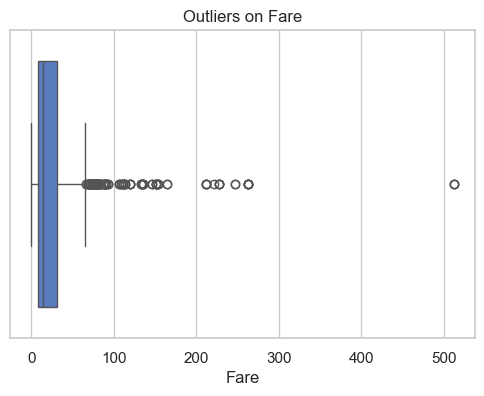

In [23]:
# Checking the Outliers
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Fare')
plt.title("Outliers on Fare")
plt.show()


In [24]:
# Handling Ourliers(Capping Method)
w = Winsorizer(capping_method = 'iqr', tail = 'right', fold = 1.5, variables = ['Fare'])
df = w.fit_transform(df)

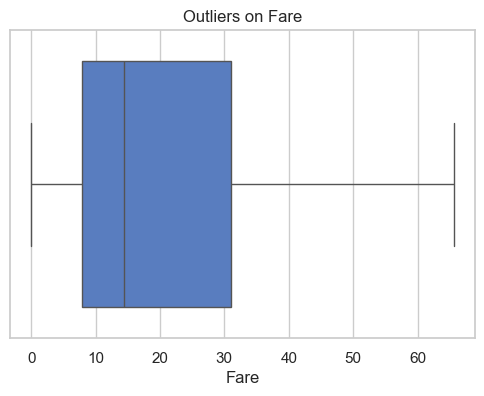

In [25]:
# Cross-Checking the Outliers
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Fare')
plt.title("Outliers on Fare")
plt.show()

- ###### **Feature Scaling on Numerical Columns**

In [26]:
# Feature Scaling on num_cols
num_cols = ['Age', 'Fare']
sc = StandardScaler()
df[num_cols] = sc.fit_transform(df[num_cols])

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_Rare
0,0,0,0,-0.565736,1,0,-0.820552,0,1,0,0,0,0
1,1,1,1,0.663861,1,0,2.031623,1,0,1,0,0,0
2,1,0,1,-0.258337,0,0,-0.787578,0,0,0,1,0,0
3,1,1,1,0.433312,1,0,1.419297,0,0,1,0,0,0
4,0,0,0,0.433312,0,0,-0.781471,0,1,0,0,0,0


###### dataset is ready

###### 

In [28]:
# Label Encoding
X = df.drop('Survived', axis=1) # features
y= df['Survived']               # target

##### Initializing Logistic Regression for Feature Selection(Wrapper Method - RFE)

In [29]:
#importing the requirred libary
from sklearn.feature_selection import RFE

# Feature Selection using Wrapper Method - RFE (Recursive Feature Elimination)
# Create the model
model = LogisticRegression(max_iter=1000)

# Apply RFE
rfe_selector = RFE(estimator = model, n_features_to_select=9)
X_selected = rfe_selector.fit_transform(X, y)
print("Selected Features(RFE) :")
print(X.columns[rfe_selector.get_support()])

Selected Features(RFE) :
Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Title_Mr', 'Title_Mrs',
       'Title_Master', 'Title_Rare'],
      dtype='object')


###### **Feature Importance**
- ###### After applying Recursive Feature Elimination (RFE) with Logistic Regression, the most important predictors were automatically selected based on their contribution to the model.
- ###### These features carried the strongest relationship with the target outcome, meaning they helped the model distinguish patterns effectively.

##### **Model Building**
- ###### Train-Test Split: 80% Train and 20% Test
- ###### Model Building
- ###### Evaluation of Performance(accuracy, precision, recall, f1, confusion matrix)

In [30]:
# Splitting the data into train(80%) and test(20%)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, random_state=29, test_size= 0.2)

# Creating the model and predicting
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Checking accuracy score
print("Accuracy Score:", accuracy_score(y_pred, y_test) * 100, "%")

# Checking Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_pred, y_test))

# Checking Classification Report
print("Classification Report:\n", classification_report(y_pred, y_test))

Accuracy Score: 83.24022346368714 %
Confusion Matrix:
 [[103  17]
 [ 13  46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       120
           1       0.73      0.78      0.75        59

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.84      0.83      0.83       179



##### **Saving the model**

In [34]:
# Importing the requirred libaries
import joblib
import pickle

In [36]:
# Saving the Model to Disk
pickle.dump(model, open('model.pkl', 'wb'))

##### **Model Evaluation**
- ###### The dataset was split into training and testing sets to evaluate generalization.
- ###### Logistic Regression was trained on the selected features.
- ###### Final accuracy: 83.24% on the test set.
- ###### This indicates a strong model fit with balanced predictive power.

#### **Final Insight from the Model**
- ###### The selected features highlight the most critical variables driving predictions.
- ###### Logistic Regression proved effective after proper preprocessing, scaling, encoding, and feature selection.
- ###### With **~83% accuracy**, the model shows good reliability for decision-making based on the dataset.


##### **Key Observations & Future Insights**
###### **Observations:**
- ###### Feature engineering and scaling improved model interpretability.
- ###### Wrapper-based feature selection (RFE) optimized performance by retaining only meaningful variables.
- ###### Logistic Regression is simple, interpretable, yet still achieved solid accuracy.
###### **Future Insights:**
- ###### Experiment with other models (e.g., Random Forest, Gradient Boosting) for potential performance gains.
- ###### Test feature selection against domain knowledge for validation.
- ###### Explore hyperparameter tuning to improve accuracy further.
- ###### Deployment as a web app (Streamlit/Flask) could make the model interactive for real-world users.